In [ ]:
!pip install newsapi-python


In [ ]:
import yfinance as yf
from newsapi import NewsApiClient
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import pickle
#Obtain API Key
news_api_key = "your_news_api_key_here"  # Replace with your actual News API key
newsapi = NewsApiClient(api_key='ad27469a98e845e9a932c8e769e6bb7a')

#Download Historical Stock Data
start_date = "2023-10-15"
end_date = "2023-11-15"
stock_data = yf.download("AAPL", start=start_date, end=end_date) #change company name to tesla and google to seen their changes throughout

# Download News Data
company_name = "Apple Inc."
news_data = newsapi.get_everything(q=company_name, from_param=start_date, to=end_date)

news_articles = []
for article in news_data['articles']:
    news_articles.append({
        'Date': pd.to_datetime(article['publishedAt']).date(),
        'Title': article['title'],
        'Description': article['description'],
        'Content': article['content']
    })

# Convert the list of dictionaries into a DataFrame
news_df = pd.DataFrame(news_articles)
news_df['Date'] = pd.to_datetime(news_df['Date'])

# Data Merging
merged_data = pd.merge(stock_data, news_df, how='inner', left_on='Date', right_on='Date')
print(merged_data)



[*********************100%%**********************]  1 of 1 completed
         Date        Open        High         Low       Close   Adj Close  \
0  2023-10-16  176.750000  179.080002  176.509995  178.720001  178.484863   
1  2023-10-16  176.750000  179.080002  176.509995  178.720001  178.484863   
2  2023-10-17  176.649994  178.419998  174.800003  177.149994  176.916916   
3  2023-10-17  176.649994  178.419998  174.800003  177.149994  176.916916   
4  2023-10-18  175.580002  177.580002  175.110001  175.839996  175.608643   
..        ...         ...         ...         ...         ...         ...   
82 2023-11-10  183.970001  186.570007  183.529999  186.399994  186.399994   
83 2023-11-10  183.970001  186.570007  183.529999  186.399994  186.399994   
84 2023-11-10  183.970001  186.570007  183.529999  186.399994  186.399994   
85 2023-11-13  185.820007  186.029999  184.210007  184.800003  184.800003   
86 2023-11-13  185.820007  186.029999  184.210007  184.800003  184.800003   

      

In [ ]:
#sentiment analysis
from textblob import TextBlob

merged_data['Sentiment'] = merged_data['Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
threshold = 0.1
merged_data['Sentiment_Label'] = merged_data['Sentiment'].apply(lambda x: 1 if x > threshold else (-1 if x < -threshold else 0))
print(merged_data)


         Date        Open        High         Low       Close   Adj Close  \
0  2023-10-16  176.750000  179.080002  176.509995  178.720001  178.484863   
1  2023-10-16  176.750000  179.080002  176.509995  178.720001  178.484863   
2  2023-10-17  176.649994  178.419998  174.800003  177.149994  176.916916   
3  2023-10-17  176.649994  178.419998  174.800003  177.149994  176.916916   
4  2023-10-18  175.580002  177.580002  175.110001  175.839996  175.608643   
..        ...         ...         ...         ...         ...         ...   
82 2023-11-10  183.970001  186.570007  183.529999  186.399994  186.399994   
83 2023-11-10  183.970001  186.570007  183.529999  186.399994  186.399994   
84 2023-11-10  183.970001  186.570007  183.529999  186.399994  186.399994   
85 2023-11-13  185.820007  186.029999  184.210007  184.800003  184.800003   
86 2023-11-13  185.820007  186.029999  184.210007  184.800003  184.800003   

      Volume                                              Title  \
0   5251

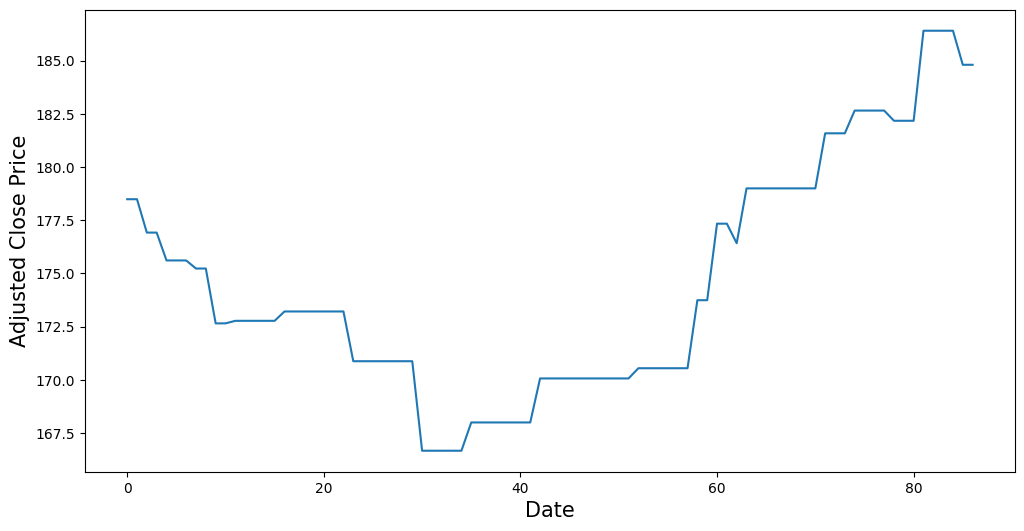

In [ ]:
# Visualize the training stock data:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.plot(merged_data["Adj Close"])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price',fontsize=15)
plt.show()

<ipython-input-20-820e6cbc18fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['m-avg'][0]=merged_data['Adj Close'][0]
<ipython-input-20-820e6cbc18fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['m-avg'][1]=merged_data['Adj Close'][1]


         Date        Open        High         Low       Close   Adj Close  \
0  2023-10-16  176.750000  179.080002  176.509995  178.720001  178.484863   
1  2023-10-16  176.750000  179.080002  176.509995  178.720001  178.484863   
2  2023-10-17  176.649994  178.419998  174.800003  177.149994  176.916916   
3  2023-10-17  176.649994  178.419998  174.800003  177.149994  176.916916   
4  2023-10-18  175.580002  177.580002  175.110001  175.839996  175.608643   
..        ...         ...         ...         ...         ...         ...   
82 2023-11-10  183.970001  186.570007  183.529999  186.399994  186.399994   
83 2023-11-10  183.970001  186.570007  183.529999  186.399994  186.399994   
84 2023-11-10  183.970001  186.570007  183.529999  186.399994  186.399994   
85 2023-11-13  185.820007  186.029999  184.210007  184.800003  184.800003   
86 2023-11-13  185.820007  186.029999  184.210007  184.800003  184.800003   

      Volume                                              Title  \
0   5251

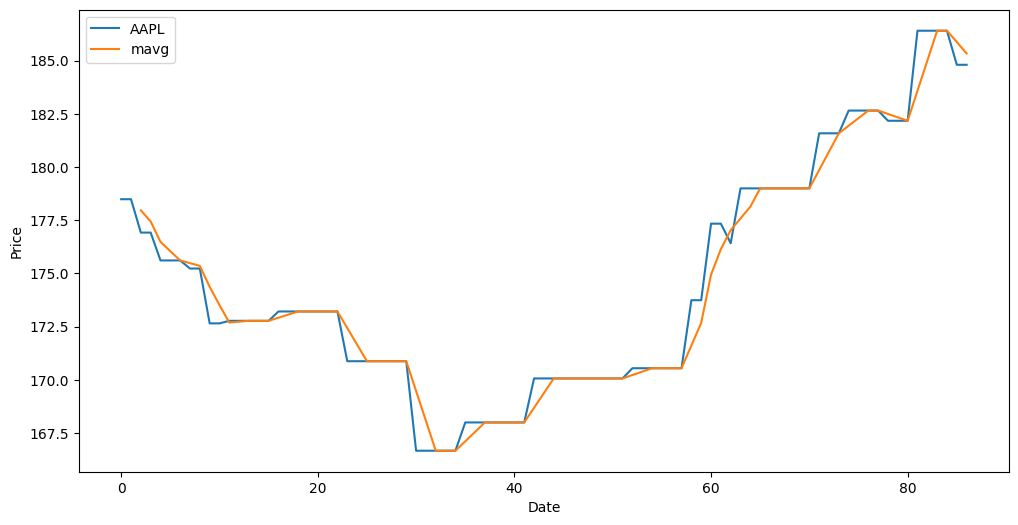

In [ ]:
#just for analysis
lose_px = merged_data['Adj Close']
mavg = lose_px.rolling(window=3).mean()
merged_data['m-avg']=mavg
merged_data['m-avg'][0]=merged_data['Adj Close'][0]
merged_data['m-avg'][1]=merged_data['Adj Close'][1]

plt.figure(figsize = (12,6))
lose_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
print(merged_data)

In [ ]:
import matplotlib.dates as mdates

#change the dates into ints for training
dates_df = merged_data.copy()
dates_df = dates_df.reset_index()

#Store the original dates for plotting the predicitons
org_dates = dates_df['Date']

#convert to int
dates_df['Date'] = dates_df['Date'].map(mdates.date2num)

dates_df.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Title,Description,Content,Sentiment,Sentiment_Label
82,82,19671.0,183.970001,186.570007,183.529999,186.399994,186.399994,66133400,Apple pays $25 million to settle suit over fav...,Apple Inc. agreed to pay $25 million to settle...,Apple Inc. agreed to pay $25 million to settle...,-0.500000,-1
83,83,19671.0,183.970001,186.570007,183.529999,186.399994,186.399994,66133400,iPhone＆iPad版『バイオハザード ヴィレッジ』をiPhone 15 Pro Maxで...,2023年10月30日にiPhone・iPad版の『バイオハザード ヴィレッジ』が販売開始に...,2021 10302iPhoneiPad\r\niPhone 15 Pro Max6.7\r...,0.000000,0
84,84,19671.0,183.970001,186.570007,183.529999,186.399994,186.399994,66133400,Apple to Pay $25 Million Settlement in US Immi...,"In a landmark settlement, tech giant Apple Inc...","In a landmark settlement, tech giant Apple Inc...",0.000000,0
85,85,19674.0,185.820007,186.029999,184.210007,184.800003,184.800003,43627500,Apple Rolls Out Budget Friendly Pencil Enhanci...,"Apple's new, budget-friendly Pencil for iPad, ...","Apple Inc. has rolled out a new, more budget-f...",0.296591,1
86,86,19674.0,185.820007,186.029999,184.210007,184.800003,184.800003,43627500,"Forget The New MacBook Pro, Apple Has Somethin...",With awkward choices around the new MacBook Pr...,Updated November 13: article originally posted...,0.012121,0


In [ ]:
'''import numpy as np
from numpy.linalg import inv
from sklearn.metrics.pairwise import rbf_kernel

def initialize_svr(C=1.0, epsilon=0.1, gamma=0.1):
    return {'C': C, 'epsilon': epsilon, 'gamma': gamma}

def fit_svr(model, X, y):
    n_samples, _ = X.shape

    # RBF kernel matrix
    K = rbf_kernel(X, X, gamma=model['gamma'])

    # Quadratic programming problem matrices
    P = np.diag(np.ones(n_samples))
    q = -y
    G = np.vstack([-np.eye(n_samples), np.eye(n_samples)])
    h = np.hstack([np.zeros(n_samples), np.ones(n_samples) * model['C']])

    # Solve quadratic programming problem
    alpha = np.array(np.linalg.solve(np.dot(np.dot(K.T, P), K) + 1e-10 * np.eye(n_samples), np.dot(K.T, q)))

    # Extract support vectors
    sv_indices = alpha > 1e-5
    support_vectors = X[sv_indices, :]
    alpha_sv = alpha[sv_indices]
    y_sv = y[sv_indices]

    # Compute intercept
    intercept = np.mean(y_sv - np.dot(alpha_sv * y_sv, K[sv_indices, :]))

    # Store support vector coefficients
    coefficients = alpha_sv * y_sv

    return {'support_vectors': support_vectors, 'coefficients': coefficients, 'intercept': intercept}

def predict_svr(model, X):
    # RBF kernel between test data and support vectors
    K_test = rbf_kernel(X, model['support_vectors'], gamma=model['gamma'])

    # Predictions
    predictions = np.dot(model['coefficients'], K_test.T) + model['intercept']
    return predictions
'''



"import numpy as np\nfrom numpy.linalg import inv\nfrom sklearn.metrics.pairwise import rbf_kernel\n\ndef initialize_svr(C=1.0, epsilon=0.1, gamma=0.1):\n    return {'C': C, 'epsilon': epsilon, 'gamma': gamma}\n\ndef fit_svr(model, X, y):\n    n_samples, _ = X.shape\n\n    # RBF kernel matrix\n    K = rbf_kernel(X, X, gamma=model['gamma'])\n\n    # Quadratic programming problem matrices\n    P = np.diag(np.ones(n_samples))\n    q = -y\n    G = np.vstack([-np.eye(n_samples), np.eye(n_samples)])\n    h = np.hstack([np.zeros(n_samples), np.ones(n_samples) * model['C']])\n\n    # Solve quadratic programming problem\n    alpha = np.array(np.linalg.solve(np.dot(np.dot(K.T, P), K) + 1e-10 * np.eye(n_samples), np.dot(K.T, q)))\n\n    # Extract support vectors\n    sv_indices = alpha > 1e-5\n    support_vectors = X[sv_indices, :]\n    alpha_sv = alpha[sv_indices]\n    y_sv = y[sv_indices]\n\n    # Compute intercept\n    intercept = np.mean(y_sv - np.dot(alpha_sv * y_sv, K[sv_indices, :]))\n\n  

In [ ]:
#Data Splitting
X = merged_data[['Sentiment_Label','Open','Close','High','Low','Volume']]  # Adjust features as needed
y = merged_data['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Building
svr_model = SVR(kernel='rbf', C= 1e3, gamma= 0.1)

#Model Training and Evaluation
svr_model.fit(X_train, y_train)
predictions = svr_model.predict(X_test)
print(predictions)
print(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test,predictions )

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


[182.54934804 178.13058251 170.97533464 173.31203886 172.87241014
 179.09431001 173.03407508 173.31203886 175.70993415 179.09431001
 186.29998025 179.09431001 170.44506988 181.46472883 186.29998025
 179.09431001 166.77074997 181.46472883]
    Sentiment_Label        Open       Close        High         Low    Volume
76                1  182.350006  182.889999  183.449997  181.589996  49340300
0                 1  176.750000  178.720001  179.080002  176.509995  52517000
26               -1  171.880005  171.100006  173.059998  170.649994  57157000
22                1  173.050003  173.440002  173.669998  171.449997  43816600
12                0  170.910004  173.000000  174.009995  169.929993  55980100
67                0  176.380005  179.229996  179.429993  176.210007  63841300
10                1  175.309998  172.880005  175.419998  172.639999  64189300
18                1  173.050003  173.440002  173.669998  171.449997  43816600
4                -1  175.580002  175.839996  177.580002  17

In [ ]:
import yfinance as yf
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
start_date = "2023-10-15"
end_date = "2023-11-15"
stock_data = yf.download("AAPL", start=start_date, end=end_date)
features = stock_data[['Close']]
stock_data['Target'] = stock_data['Close'].shift(-1)


stock_data.dropna(inplace=True)


X = stock_data[['Close']]
y = stock_data['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale')  # Adjust hyperparameters as needed

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions for the next 30 days
next_30_days = pd.date_range(end=end_date, periods=30, freq='B')  # Assuming business days

# Create a DataFrame for the next 30 days with the same structure as X (features)
X_next_30_days = pd.DataFrame(index=next_30_days, columns=X.columns)

# Fill NaN values in the new DataFrame with zeros or adjust based on your preprocessing
X_next_30_days.fillna(0, inplace=True)

# Predictions for the next 30 days
predictions = svr_model.predict(X_next_30_days)

# Print or use the predictions as needed
print("Predictions for the next 30 days:")
print(predictions)


[*********************100%%**********************]  1 of 1 completed
Predictions for the next 30 days:
[176.62607774 176.62607774 176.62607774 176.62607774 176.62607774
 176.62607774 176.62607774 176.62607774 176.62607774 176.62607774
 176.62607774 176.62607774 176.62607774 176.62607774 176.62607774
 176.62607774 176.62607774 176.62607774 176.62607774 176.62607774
 176.62607774 176.62607774 176.62607774 176.62607774 176.62607774
 176.62607774 176.62607774 176.62607774 176.62607774 176.62607774]


In [ ]:
with open('svr_model.pkl', 'wb') as model_file:
    pickle.dump(svr_model, model_file)